In [45]:
import pickle
import matplotlib.pyplot as plt
import wfdb

In [46]:
# 데이터 및 결과 파일 경로 설정
base_dir = '/home/explorer/PDC/jisulee/PhysioNet/data/'

# 환자 데이터 이름 설정
patient_name = 'a01'
# ECG 신호 로드 (변경 가능)
signal, fields = wfdb.rdsamp(base_dir + patient_name, channels=[0])

save_dir = '/home/explorer/PDC/jisulee/new/1. preprocessing/pkl(both)/'

In [47]:
# R-peak 데이터 로드
with open(save_dir + f'{patient_name}_r.pkl', 'rb') as f_r:
    rpeaks_data = pickle.load(f_r)
# data unpacking: 시간과 진폭 분리
rri_data, amp_data = zip(*rpeaks_data)
amp_tm, amp_signal = zip(*amp_data)
r_peak_indices = [int(tm * fields['fs']) for tm in amp_tm[0]]

# S-peak 데이터 로드
with open(save_dir + f'{patient_name}_s.pkl', 'rb') as f_s:
    speaks_data = pickle.load(f_s)
# data unpacking: 시간과 진폭 분리
ssi_data, amp_data = zip(*speaks_data)
amp_tm, amp_signal = zip(*amp_data)
s_peak_indices = [int(tm * fields['fs']) for tm in amp_tm[0]]

In [50]:
# 시각화 범위 설정
start_index = 0
end_index = 10000  # for example, show the first 300 points

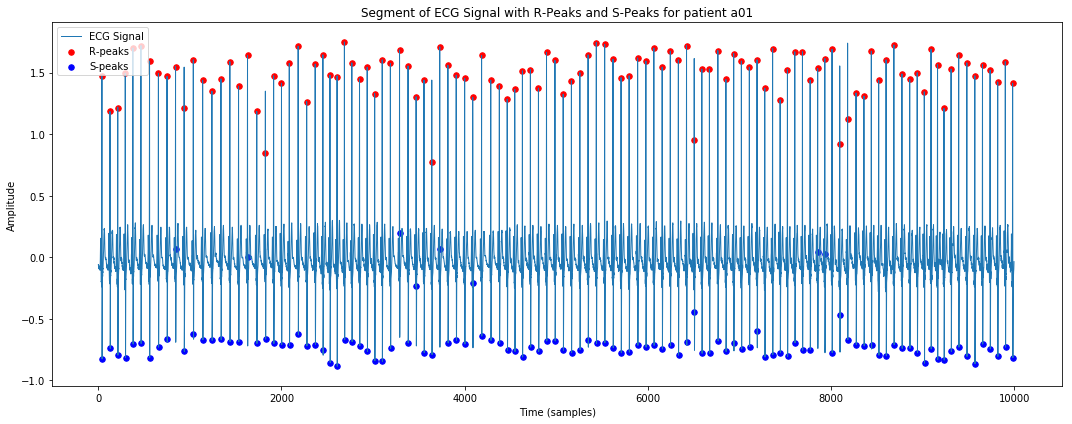

In [51]:
# 시각화
plt.figure(figsize=(15, 6))
plt.plot(signal[start_index:end_index], label='ECG Signal', linewidth=1)

# R-peak 위치에 빨간색 점 표시
plt.scatter([idx for idx in r_peak_indices if start_index <= idx < end_index],
            [signal[idx] for idx in r_peak_indices if start_index <= idx < end_index],
            color='red', s=30, label='R-peaks')

# S-peak 위치에 파란색 점 표시
plt.scatter([idx for idx in s_peak_indices if start_index <= idx < end_index],
            [signal[idx] for idx in s_peak_indices if start_index <= idx < end_index],
            color='blue', s=30, label='S-peaks')

plt.title(f'Segment of ECG Signal with R-Peaks and S-Peaks for patient {patient_name}')
plt.legend()
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
